# INM701 Coursework

Predicting heart attack using machine learning, particularly random forests, logistic regression, and neural networks.

### Importing libraries and selecting random seed

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(50)
tf.random.set_seed(50)

### Dataset upload

In [2]:
path = "Heart Attack.csv"
filename_read = os.path.join(path)
df = pd.read_csv(filename_read, na_values=["NA", "?"])

## Data Analysis
### Check the dataset type

In [3]:
df.dtypes

age                int64
gender             int64
impluse            int64
pressurehight      int64
pressurelow        int64
glucose          float64
kcm              float64
troponin         float64
class             object
dtype: object

In [4]:
print(df.describe())

               age       gender      impluse  pressurehight  pressurelow  \
count  1319.000000  1319.000000  1319.000000    1319.000000  1319.000000   
mean     56.191812     0.659591    78.336619     127.170584    72.269143   
std      13.647315     0.474027    51.630270      26.122720    14.033924   
min      14.000000     0.000000    20.000000      42.000000    38.000000   
25%      47.000000     0.000000    64.000000     110.000000    62.000000   
50%      58.000000     1.000000    74.000000     124.000000    72.000000   
75%      65.000000     1.000000    85.000000     143.000000    81.000000   
max     103.000000     1.000000  1111.000000     223.000000   154.000000   

           glucose          kcm     troponin  
count  1319.000000  1319.000000  1319.000000  
mean    146.634344    15.274306     0.360942  
std      74.923045    46.327083     1.154568  
min      35.000000     0.321000     0.001000  
25%      98.000000     1.655000     0.006000  
50%     116.000000     2.850000  

In [5]:
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [6]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


### Check the missing values

In [7]:
missing_values = df.isnull().sum()

print("Missing Values:\n", missing_values)

if missing_values.sum() == 0:
    print("No missing values in the DataFrame.")
else:
    print("There are missing values in the DataFrame.")

Missing Values:
 age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64
No missing values in the DataFrame.


In [8]:
df.columns

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin', 'class'],
      dtype='object')

In [9]:
columns =  ["age","gender","impluse","pressurehight","pressurelow","glucose","kcm","troponin","class"]

pd.set_option("display.float_format", "{:.2f}".format)

df[columns].describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.00,1319.00,1319.00,1319.00,1319.00,1319.00,1319.00,1319.00
mean,56.19,0.66,78.34,127.17,72.27,146.63,15.27,0.36
std,13.65,0.47,51.63,26.12,14.03,74.92,46.33,1.15
min,14.00,0.00,20.00,42.00,38.00,35.00,0.32,0.00
25%,47.00,0.00,64.00,110.00,62.00,98.00,1.65,0.01
50%,58.00,1.00,74.00,124.00,72.00,116.00,2.85,0.01
75%,65.00,1.00,85.00,143.00,81.00,169.50,5.80,0.09
max,103.00,1.00,1111.00,223.00,154.00,541.00,300.00,10.30


### Correlation between dataset

In [10]:
# Define the columns to be used for correlation calculation
columns = ["age","gender","impluse","pressurehight","pressurelow","glucose","kcm","troponin"]

# Calculate the correlations between different features

data = df[columns]
correlation_matrix = data.corr()
correlation_matrix

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
age,1.00,-0.09,-0.02,0.02,0.00,-0.00,0.02,0.09
gender,-0.09,1.00,-0.03,0.01,-0.01,0.01,0.02,0.07
impluse,-0.02,-0.03,1.00,0.01,0.11,-0.02,-0.01,0.01
pressurehight,0.02,0.01,0.01,1.00,0.59,0.02,-0.02,0.04
pressurelow,0.00,-0.01,0.11,0.59,1.00,-0.03,-0.02,0.04
glucose,-0.00,0.01,-0.02,0.02,-0.03,1.00,0.05,0.02
kcm,0.02,0.02,-0.01,-0.02,-0.02,0.05,1.00,-0.02
troponin,0.09,0.07,0.01,0.04,0.04,0.02,-0.02,1.00


### Correlation matrix

In [11]:
!pip install plotly
import plotly.figure_factory as ff
# fraction value upto 2 decimal 
corr_matrix= correlation_matrix.round(2)  

fig = ff.create_annotated_heatmap(
    x=list(corr_matrix.columns),
    y=list(corr_matrix.index),
    z=corr_matrix.values,
    zmax=1.0,  # maximum value for color scale
    zmin=-1.0,  # minimum value for color scale
    colorscale="Blues") 

# Add color bar
colorbar = dict(
    title="Correlation",  # Color bar title
    tickvals=[-1, -0.5, 0, 0.5, 1],  # Specify tick positions
    ticktext=["-1", "-0.5", "0", "0.5", "1"],  # Specify tick labels
)

fig["data"][0]["showscale"] = True
fig["layout"]["coloraxis"]["colorbar"] = colorbar
fig.update_layout(
    height=500,
    width=800,
)

fig.show()

c:\Users\barla\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


### Distribution

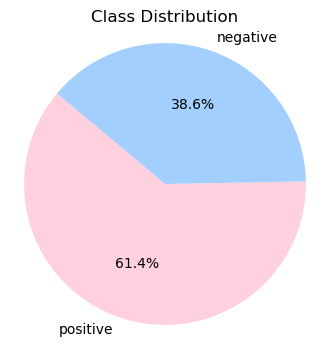

In [12]:
# Count values for the "class" 
class_counts = df["class"].value_counts()

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=class_counts.index, autopct="%1.1f%%", startangle=140, colors=["#ffd1df", "#a2cffe"])
plt.title("Class Distribution")
plt.axis("equal") 
plt.show()

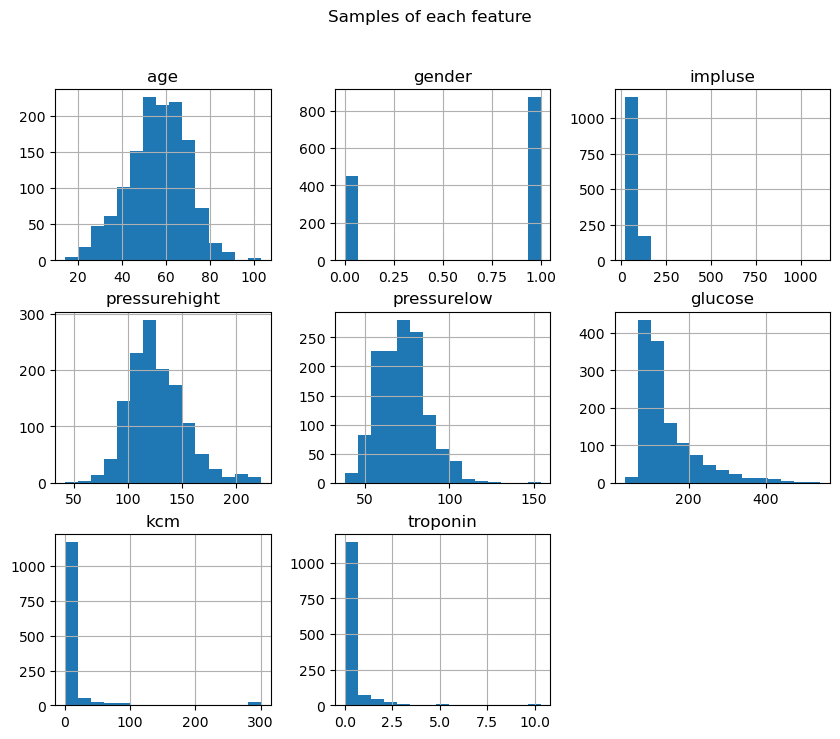

In [13]:
# Create DataFrame
df = pd.DataFrame(df)

# Histograms
df.hist(bins=15, figsize=(10, 8))
plt.suptitle("Samples of each feature")
plt.show()

### Dataset Training

In [14]:

# Map "positive" to 1 and "negative" to 0
df["class"] = df["class"].map({"positive": 1, "negative": 0})

print(df)

      age  gender  impluse  pressurehight  pressurelow  glucose   kcm  \
0      64       1       66            160           83   160.00  1.80   
1      21       1       94             98           46   296.00  6.75   
2      55       1       64            160           77   270.00  1.99   
3      64       1       70            120           55   270.00 13.87   
4      55       1       64            112           65   300.00  1.08   
...   ...     ...      ...            ...          ...      ...   ...   
1314   44       1       94            122           67   204.00  1.63   
1315   66       1       84            125           55   149.00  1.33   
1316   45       1       85            168          104    96.00  1.24   
1317   54       1       58            117           68   443.00  5.80   
1318   51       1       94            157           79   134.00 50.89   

      troponin  class  
0         0.01      0  
1         1.06      1  
2         0.00      0  
3         0.12      1  
4  

In [15]:
X = df.drop(["class", "troponin"], axis=1)
y = df["class"]

X.shape, y.shape

((1319, 7), (1319,))

In [16]:
df["class"].value_counts()

class
1    810
0    509
Name: count, dtype: int64

### Split the dataset

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# split the dataset into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

((1055, 7), (1055,), (264, 7), (264,))

### Initialize the Random Forest and hyperparameters

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.67      0.57      0.62       101
           1       0.76      0.82      0.79       163

    accuracy                           0.73       264
   macro avg       0.71      0.70      0.70       264
weighted avg       0.72      0.73      0.72       264

              precision    recall  f1-score   support

           0       0.64      0.51      0.57       101
           1       0.73      0.82      0.77       163

    accuracy                           0.70       264
   macro avg       0.69      0.67      0.67       264
weighted avg       0.70      0.70      0.70       264



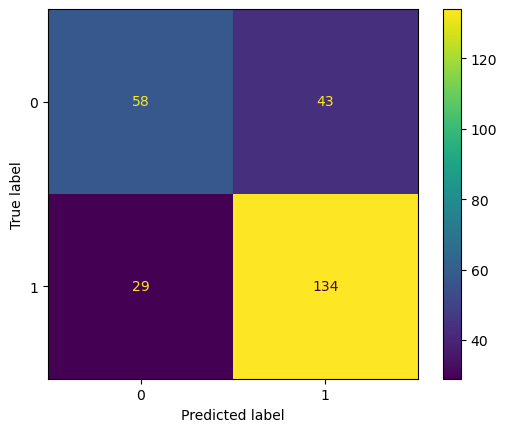

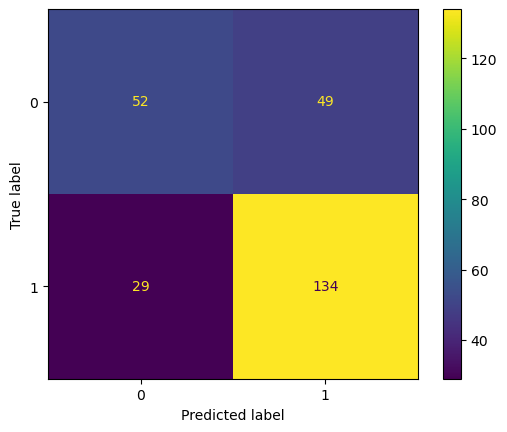

Accuracy (Basic): 0.727273
Accuracy (GridSearch): 0.704545


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

# Initialize and fit the basic RandomForestClassifier
random_forest = RandomForestClassifier(random_state=50, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, bootstrap=True)
random_forest.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_basic = random_forest.predict(X_test_scaled)

# Define the hyperparameters to tune
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

# Initialize GridSearchCV with the RandomForestClassifier
grid_search_randomf = GridSearchCV(estimator=RandomForestClassifier(random_state=50), param_grid=param_grid, 
                           cv=5, scoring="accuracy", n_jobs=-1, verbose=2)

# Fit the GridSearchCV
grid_search_randomf.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print(f"Best hyperparameters: {grid_search_randomf.best_params_}")

# Make predictions on the test set with best hyperparameter set
y_pred_best = grid_search_randomf.predict(X_test_scaled)

# Evaluate the models
classification_rep1 = classification_report(y_test, y_pred_basic)
print(classification_rep1)

classification_rep2 = classification_report(y_test, y_pred_best)
print(classification_rep2)

# Confusion Matrix
conf_matrix1 = confusion_matrix(y_test, y_pred_basic)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix1)
display.plot()
plt.show()

conf_matrix2 = confusion_matrix(y_test, y_pred_best)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix2)
display.plot()
plt.show()

# Accuracy
accuracy1 = accuracy_score(y_test, y_pred_basic)
print(f"Accuracy (Basic): {accuracy1:.6f}")
accuracy2 = accuracy_score(y_test, y_pred_best)
print(f"Accuracy (GridSearch): {accuracy2:.6f}")

### Initializing Logistic regression

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best hyperparameters: {'C': 1.05, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}
              precision    recall  f1-score   support

           0       0.69      0.52      0.60       101
           1       0.74      0.85      0.79       163

    accuracy                           0.73       264
   macro avg       0.72      0.69      0.69       264
weighted avg       0.72      0.73      0.72       264

              precision    recall  f1-score   support

           0       0.70      0.56      0.63       101
           1       0.76      0.85      0.80       163

    accuracy                           0.74       264
   macro avg       0.73      0.71      0.71       264
weighted avg       0.74      0.74      0.74       264



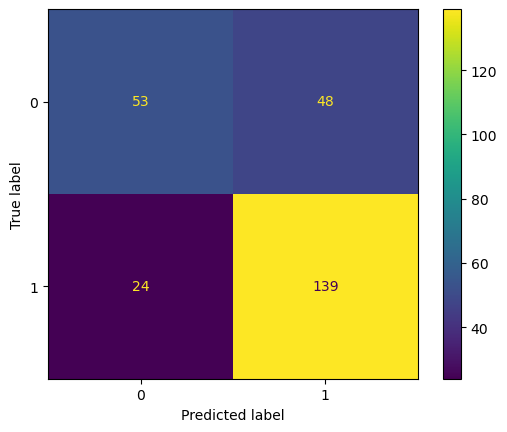

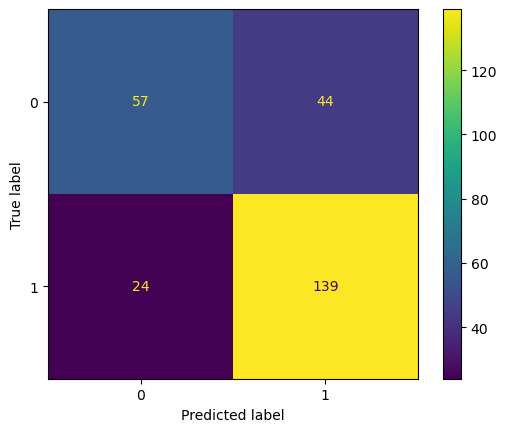

Accuracy (Basic): 0.727273
Accuracy (GridSearch): 0.742424


In [19]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit the LogisticRegression
log_regression = LogisticRegression(random_state=50, penalty="l2", fit_intercept=True, C=1.0, tol=1e-4, solver="liblinear")
log_regression.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_basic = log_regression.predict(X_test_scaled)

# Define the hyperparameters to tune
param_grid = {
    "penalty": ["l1", "l2"],
    "fit_intercept": [True, False],
    "C": [0.1, 0.5, 0.7, 0.8, 0.95, 1.0, 1.05, 1.1, 1.15],
    "tol": [1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
    "solver": ["liblinear"]
}

# Initialize GridSearchCV with the RandomForestClassifier
grid_search_logistic = GridSearchCV(estimator=LogisticRegression(random_state=50), param_grid=param_grid, 
                           cv=5, scoring="accuracy", n_jobs=-1, verbose=2)

# Fit the GridSearchCV
grid_search_logistic.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print(f"Best hyperparameters: {grid_search_logistic.best_params_}")

# Make predictions on the test set with best hyperparameter set
y_pred_best = grid_search_logistic.predict(X_test_scaled)

# Evaluate the models
classification_rep1 = classification_report(y_test, y_pred_basic)
print(classification_rep1)

classification_rep2 = classification_report(y_test, y_pred_best)
print(classification_rep2)

# Confusion Matrix
conf_matrix1 = confusion_matrix(y_test, y_pred_basic)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix1)
display.plot()
plt.show()

conf_matrix2 = confusion_matrix(y_test, y_pred_best)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix2)
display.plot()
plt.show()

# Accuracy
accuracy1 = accuracy_score(y_test, y_pred_basic)
print(f"Accuracy (Basic): {accuracy1:.6f}")
accuracy2 = accuracy_score(y_test, y_pred_best)
print(f"Accuracy (GridSearch): {accuracy2:.6f}")

### Initializing neural networks

### Neural Network Model 1

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

# Encoding required for neural networks

# https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/
def prepare_targets(y_train, y_test):
	enc = LabelEncoder()
	enc.fit(y_train)
	y_train_enc = enc.transform(y_train)
	y_test_enc = enc.transform(y_test)
	return y_train_enc, y_test_enc

y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

batch_size = 64
n_epochs = 100

model_nn = Sequential()
model_nn.add(Dense(128, activation="relu"))
model_nn.add(Dense(1, activation="sigmoid"))

model_nn.compile(loss="BinaryCrossentropy", optimizer=Adam(), metrics=["accuracy"])
monitor = EarlyStopping(monitor="loss", verbose=1, min_delta=1e-4, mode="auto", patience=10)
history = model_nn.fit(X_train_scaled, y_train_enc, callbacks = [monitor], batch_size=batch_size, epochs=n_epochs, verbose=1)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5895 - loss: 0.6896
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.6607 - loss: 0.6470
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.6747 - loss: 0.6223
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.6877 - loss: 0.6060
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.6831 - loss: 0.5942
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.6879 - loss: 0.5851
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.6940 - loss: 0.5779
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6928 - loss: 0.5724 
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.6961 - loss: 0.5682
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.6943 - loss: 0.5646
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.6949 - loss: 0.5615
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.7559 - loss: 0.4833
Accuracy: 0.76398104429245


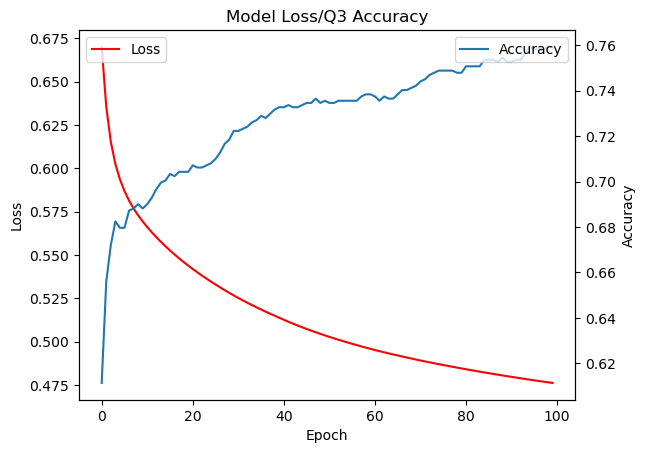

In [21]:
# Accuracy for training data
evals = model_nn.evaluate(X_train_scaled, y_train_enc)
print("Accuracy:", evals[1])

# Plot model loss
plt.plot(history.history["loss"], color = "red")
plt.title("Model Loss/Q3 Accuracy")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss"], loc = "upper left")

# Plot model Q3 accuracy
plt2 = plt.twinx()
plt2.plot(history.history["accuracy"])
plt.ylabel("Accuracy")
plt2.legend(["Accuracy"], loc = "upper right")
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

           0       0.65      0.48      0.55       101
           1       0.72      0.84      0.78       163

    accuracy                           0.70       264
   macro avg       0.68      0.66      0.66       264
weighted avg       0.69      0.70      0.69       264



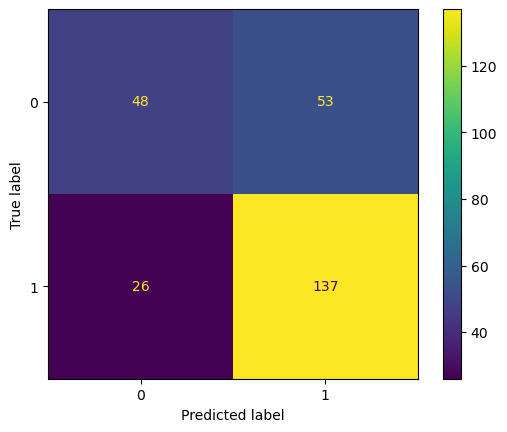

Accuracy: 0.700758


In [22]:
# Make predictions on the test set
y_pred_nn = model_nn.predict(X_test_scaled)
y_pred_nn = np.array([1 if x >= 0.5 else 0 for x in y_pred_nn])

# Evaluate the models
classification_rep = classification_report(y_test_enc, y_pred_nn)
print(classification_rep)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_enc, y_pred_nn)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
display.plot()
plt.show()

# Accuracy
accuracy = accuracy_score(y_test_enc, y_pred_nn)
print(f"Accuracy: {accuracy:.6f}")

### Neural Network Model 2

In [23]:
model_nn_1 = Sequential()
model_nn_1.add(Dense(128, activation="relu"))
model_nn_1.add(Dense(128, activation="relu"))
model_nn_1.add(Dense(1, activation="sigmoid"))

model_nn_1.compile(loss="BinaryCrossentropy", optimizer=Adam(), metrics=["accuracy"])
monitor = EarlyStopping(monitor="loss", verbose=1, min_delta=1e-4, mode="auto", patience=10)
history_1 = model_nn_1.fit(X_train_scaled, y_train_enc, callbacks = [monitor], batch_size=batch_size, epochs=n_epochs, verbose=1)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5266 - loss: 0.6889
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.6701 - loss: 0.6174
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.6788 - loss: 0.5894
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.6911 - loss: 0.5760
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.6929 - loss: 0.5667
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.6945 - loss: 0.5585
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.6976 - loss: 0.5513
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7078 - loss: 0.5442 
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.7071 - loss: 0.5377
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.7075 - loss: 0.5317
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.7134 - loss: 0.5261
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.8491 - loss: 0.3505
Accuracy: 0.8549762964248657


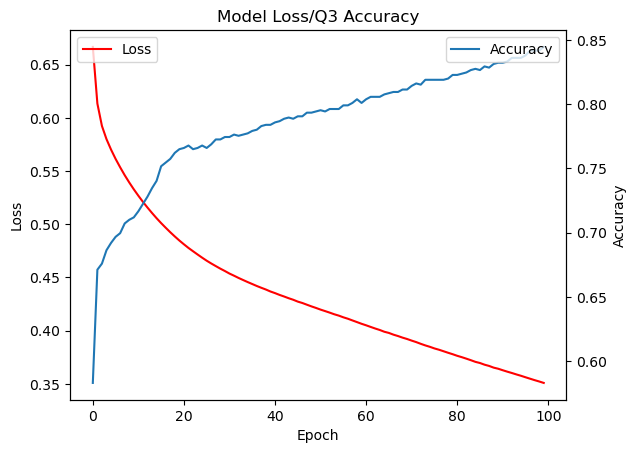

In [24]:
# Accuracy for training data
evals = model_nn_1.evaluate(X_train_scaled, y_train_enc)
print("Accuracy:", evals[1])

# Plot model loss
plt.plot(history_1.history["loss"], color = "red")
plt.title("Model Loss/Q3 Accuracy")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss"], loc = "upper left")

# Plot model Q3 accuracy
plt2 = plt.twinx()
plt2.plot(history_1.history["accuracy"])
plt.ylabel("Accuracy")
plt2.legend(["Accuracy"], loc = "upper right")
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
              precision    recall  f1-score   support

           0       0.64      0.54      0.59       101
           1       0.74      0.81      0.77       163

    accuracy                           0.71       264
   macro avg       0.69      0.68      0.68       264
weighted avg       0.70      0.71      0.70       264



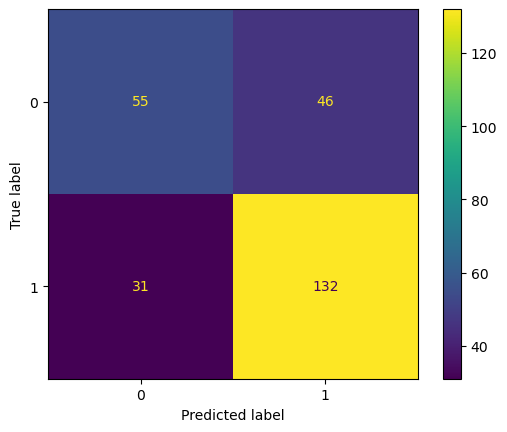

Accuracy: 0.708333


In [25]:
# Make predictions on the test set
y_pred_nn = model_nn_1.predict(X_test_scaled)
y_pred_nn = np.array([1 if x >= 0.5 else 0 for x in y_pred_nn])

# Evaluate the models
classification_rep = classification_report(y_test_enc, y_pred_nn)
print(classification_rep)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_enc, y_pred_nn)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_enc, y_pred_nn)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
display.plot()
plt.show()

# Accuracy
accuracy = accuracy_score(y_test_enc, y_pred_nn)
print(f"Accuracy: {accuracy:.6f}")

### Neural Network Model 3

In [26]:
model_nn_2 = Sequential()
model_nn_2.add(Dense(128, activation="relu"))
model_nn_2.add(Dense(128, activation="relu"))
model_nn_2.add(Dense(128, activation="relu"))
model_nn_2.add(Dense(1, activation="sigmoid"))

model_nn_2.compile(loss="BinaryCrossentropy", optimizer=Adam(), metrics=["accuracy"])
monitor = EarlyStopping(monitor="loss", verbose=1, min_delta=1e-4, mode="auto", patience=10)
history_2 = model_nn_2.fit(X_train_scaled, y_train_enc, callbacks = [monitor], batch_size=batch_size, epochs=n_epochs, verbose=1)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5147 - loss: 0.6833
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6587 - loss: 0.6225 
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6841 - loss: 0.5834 
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.7037 - loss: 0.5630
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7206 - loss: 0.5481 
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7289 - loss: 0.5339 
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7357 - loss: 0.5216 
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7375 - loss: 0.5117 
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7596 - loss: 0.5028 
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7620 - loss: 0.4943 
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7744 - loss: 0.4877 
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.9413 - loss: 0.1864
Accuracy: 0.9412322044372559


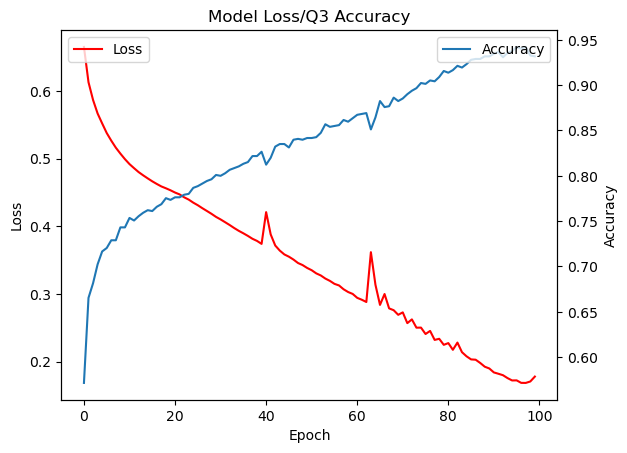

In [27]:
# Accuracy for training data
evals = model_nn_2.evaluate(X_train_scaled, y_train_enc)
print("Accuracy:", evals[1])

# Plot model loss
plt.plot(history_2.history["loss"], color = "red")
plt.title("Model Loss/Q3 Accuracy")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss"], loc = "upper left")

# Plot model Q3 accuracy
plt2 = plt.twinx()
plt2.plot(history_2.history["accuracy"])
plt.ylabel("Accuracy")
plt2.legend(["Accuracy"], loc = "upper right")
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
              precision    recall  f1-score   support

           0       0.50      0.42      0.45       101
           1       0.67      0.74      0.71       163

    accuracy                           0.62       264
   macro avg       0.59      0.58      0.58       264
weighted avg       0.61      0.62      0.61       264



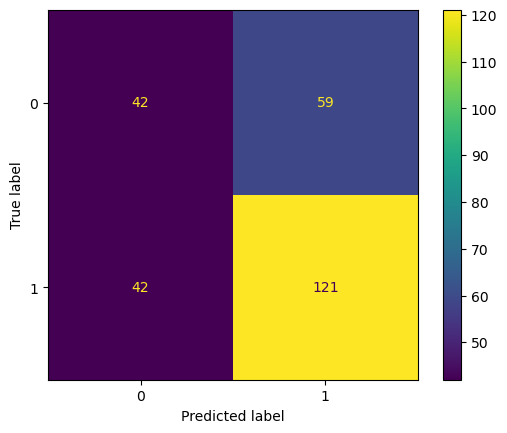

Accuracy: 0.617424


In [28]:
# Make predictions on the test set
y_pred_nn = model_nn_2.predict(X_test_scaled)
y_pred_nn = np.array([1 if x >= 0.5 else 0 for x in y_pred_nn])

# Evaluate the models
classification_rep = classification_report(y_test_enc, y_pred_nn)
print(classification_rep)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_enc, y_pred_nn)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
display.plot()
plt.show()

# Accuracy
accuracy = accuracy_score(y_test_enc, y_pred_nn)
print(f"Accuracy: {accuracy:.6f}")

### Neural Network Model 4

In [29]:
from tensorflow.keras.layers import Dropout 

model_nn_3 = Sequential()
model_nn_3.add(Dense(128, activation="relu"))
model_nn_3.add(Dropout(0.5))
model_nn_3.add(Dense(128, activation="relu"))
model_nn_3.add(Dropout(0.2))
model_nn_3.add(Dense(128, activation="relu"))
model_nn_3.add(Dense(1, activation="sigmoid"))

model_nn_3.compile(loss="BinaryCrossentropy", optimizer=Adam(), metrics=["accuracy"])
monitor = EarlyStopping(monitor="loss", verbose=1, min_delta=1e-4, mode="auto", patience=10)
history_3 = model_nn_3.fit(X_train_scaled, y_train_enc, callbacks = [monitor], batch_size=batch_size, epochs=n_epochs, verbose=1)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5764 - loss: 0.6755
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6321 - loss: 0.6267 
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6467 - loss: 0.6211 
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6743 - loss: 0.6001 
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6934 - loss: 0.5789 
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6781 - loss: 0.5720 
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6884 - loss: 0.5778 
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6734 - loss: 0.5667 
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7089 - loss: 0.5554 
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6960 - loss: 0.5511 
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6676 - loss: 0.5878 
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.7529 - loss: 0.4571
Accuracy: 0.7725118398666382


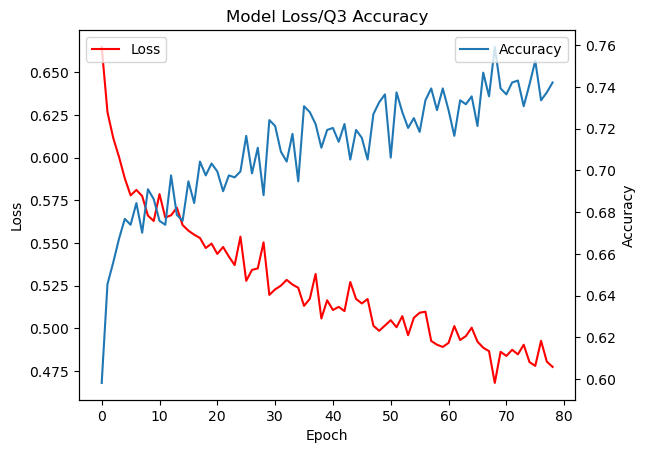

In [30]:
# Accuracy for training data
evals = model_nn_3.evaluate(X_train_scaled, y_train_enc)
print("Accuracy:", evals[1])

# Plot model loss
plt.plot(history_3.history["loss"], color = "red")
plt.title("Model Loss/Q3 Accuracy")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss"], loc = "upper left")

# Plot model Q3 accuracy
plt2 = plt.twinx()
plt2.plot(history_3.history["accuracy"])
plt.ylabel("Accuracy")
plt2.legend(["Accuracy"], loc = "upper right")
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
              precision    recall  f1-score   support

           0       0.66      0.50      0.56       101
           1       0.73      0.84      0.78       163

    accuracy                           0.71       264
   macro avg       0.69      0.67      0.67       264
weighted avg       0.70      0.71      0.70       264



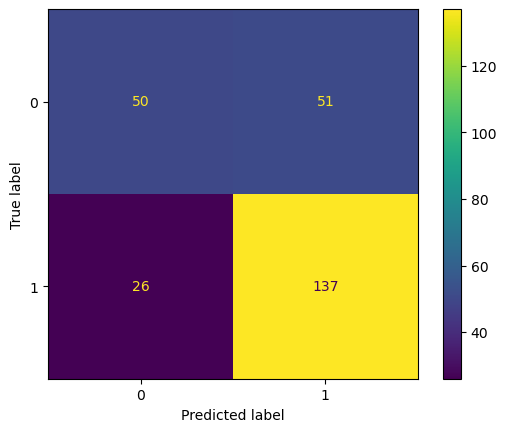

Accuracy: 0.708333


In [31]:
# Make predictions on the test set
y_pred_nn = model_nn_3.predict(X_test_scaled)
y_pred_nn = np.array([1 if x >= 0.5 else 0 for x in y_pred_nn])

# Evaluate the models
classification_rep = classification_report(y_test_enc, y_pred_nn)
print(classification_rep)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_enc, y_pred_nn)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
display.plot()
plt.show()

# Accuracy
accuracy = accuracy_score(y_test_enc, y_pred_nn)
print(f"Accuracy: {accuracy:.6f}")